<a href="https://colab.research.google.com/github/rakshitakaushik/Prediction-of-lunar-effects-using-machine-learning/blob/main/bird_migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stopover.csv to stopover.csv
Saving flights.csv to flights.csv


In [ ]:
import pandas as pd

# Load the first database
database1 = pd.read_csv('stopover.csv')

# Load the second database
database2 = pd.read_csv('flights.csv')

# Inspect the first few rows of each database
print("Database 1 - First 15 rows:")
print(database1.head(15))

print("\nDatabase 2 - First 15 rows:")
print(database2.head(15))

In [ ]:


# Merge the databases using a common key
merged_df = pd.merge(database1, database2, on='Id', how='inner')

# Display the merged dataframe
print("\nMerged DataFrame - first 10 rows:")
print(merged_df.head(10))

# Now you can proceed with preprocessing the merged dataframe



Merged DataFrame - first 10 rows:
       Id     Region  Season  Duration  Timing  Exp. Time.        Date  Flight
0  X15056  Temperate  Autumn      34.0    20.0        32.0  07-08-2016     0.0
1  X15056  Temperate  Autumn      34.0    20.0        32.0  08-08-2016     0.0
2  X15056  Temperate  Autumn      34.0    20.0        32.0  09-08-2016     0.0
3  X15056  Temperate  Autumn      34.0    20.0        32.0  10-08-2016     0.0
4  X15056  Temperate  Autumn      34.0    20.0        32.0  11-08-2016     0.0
5  X15056  Temperate  Autumn      34.0    20.0        32.0  12-08-2016     0.0
6  X15056  Temperate  Autumn      34.0    20.0        32.0  13-08-2016     0.0
7  X15056  Temperate  Autumn      34.0    20.0        32.0  14-08-2016     0.0
8  X15056  Temperate  Autumn      34.0    20.0        32.0  15-08-2016     0.0
9  X15056  Temperate  Autumn      34.0    20.0        32.0  16-08-2016     0.0


In [ ]:
# Preprocessing for Merged DataFrame
# Convert 'Date' column to datetime format with the correct format specified
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%m-%Y')

# Extract additional features from 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['year'] = merged_df['Date'].dt.year

In [ ]:
import pandas as pd



# Inspect the first few rows of the dataframe
print("First few rows of the merged dataframe:")
print(merged_df.head())

# Check the data types of each column
print("\nData types of each column:")
print(merged_df.dtypes)

# Attempt to convert each column to numeric type
for column in merged_df.columns:
    try:
        merged_df[column] = pd.to_numeric(merged_df[column])
    except ValueError as e:
        print(f"Error converting column '{column}': {e}")

# Check if any non-numeric values remain in the dataframe
non_numeric_values = merged_df.select_dtypes(exclude='number')
if not non_numeric_values.empty:
    print("\nNon-numeric values:")
    print(non_numeric_values)

# If non-numeric values are found, you can decide on an appropriate strategy to handle them



First few rows of the merged dataframe:
       Id     Region  Season  Duration  Timing  Exp. Time.       Date  Flight  \
0  X15056  Temperate  Autumn      34.0    20.0        32.0 2016-08-07     0.0   
1  X15056  Temperate  Autumn      34.0    20.0        32.0 2016-08-08     0.0   
2  X15056  Temperate  Autumn      34.0    20.0        32.0 2016-08-09     0.0   
3  X15056  Temperate  Autumn      34.0    20.0        32.0 2016-08-10     0.0   
4  X15056  Temperate  Autumn      34.0    20.0        32.0 2016-08-11     0.0   

   Month  Day  year  
0      8    7  2016  
1      8    8  2016  
2      8    9  2016  
3      8   10  2016  
4      8   11  2016  

Data types of each column:
Id                    object
Region                object
Season                object
Duration             float64
Timing               float64
Exp. Time.           float64
Date          datetime64[ns]
Flight               float64
Month                  int32
Day                    int32
year                   

In [ ]:
# Apply one-hot encoding to categorical columns
merged_df_encoded = pd.get_dummies(merged_df, columns=['Region', 'Season'])

# Drop the original categorical columns
merged_df_encoded.drop(columns=['Id'], inplace=True)  # Assuming 'Id' is not useful for analysis

# Inspect the encoded dataframe
print("Encoded dataframe:")
print(merged_df_encoded.head())


Encoded dataframe:
   Duration  Timing  Exp. Time.                 Date  Flight  Month  Day  \
0      34.0    20.0        32.0  1470528000000000000     0.0      8    7   
1      34.0    20.0        32.0  1470614400000000000     0.0      8    8   
2      34.0    20.0        32.0  1470700800000000000     0.0      8    9   
3      34.0    20.0        32.0  1470787200000000000     0.0      8   10   
4      34.0    20.0        32.0  1470873600000000000     0.0      8   11   

   year  Region_Sahel  Region_Temperate  Season_Autumn  Season_Spring  
0  2016         False              True           True          False  
1  2016         False              True           True          False  
2  2016         False              True           True          False  
3  2016         False              True           True          False  
4  2016         False              True           True          False  


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Convert 'Date' column to datetime object
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Handle missing values (if any)
merged_df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Scale numerical features
scaler = StandardScaler()
merged_df[['Duration', 'Timing', 'Exp. Time.']] = scaler.fit_transform(merged_df[['Duration', 'Timing', 'Exp. Time.']])

# Inspect the preprocessed data
print(merged_df.head())


       Id     Region  Season  Duration    Timing  Exp. Time.       Date  \
0  X15056  Temperate  Autumn  1.419678  0.393776    1.419678 2016-08-07   
1  X15056  Temperate  Autumn  1.419678  0.393776    1.419678 2016-08-08   
2  X15056  Temperate  Autumn  1.419678  0.393776    1.419678 2016-08-09   
3  X15056  Temperate  Autumn  1.419678  0.393776    1.419678 2016-08-10   
4  X15056  Temperate  Autumn  1.419678  0.393776    1.419678 2016-08-11   

   Flight  Month  Day  year  
0     0.0      8    7  2016  
1     0.0      8    8  2016  
2     0.0      8    9  2016  
3     0.0      8   10  2016  
4     0.0      8   11  2016  


In [ ]:
import pandas as pd


# Replace 'Flight' with the actual name of your target variable if it's different
y = merged_df['Flight']  # Target variable (migration patterns)
X = merged_df.drop(columns=['Flight', 'Id', 'Date'])  # Independent variables (features)

# Optionally, you might want to drop other columns that are not useful for prediction
# Adjust the list of columns to drop based on your specific dataset

# Print the shapes of X and y to verify the split
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Display the first few rows of X and y
print("X (features):")
print(X.head(2000))
print("\ny (target variable - migration patterns):")
print(y.head(2000))


Shape of X: (28516, 8)
Shape of y: (28516,)
X (features):
         Region  Season  Duration    Timing  Exp. Time.  Month  Day  year
0     Temperate  Autumn  1.419678  0.393776    1.419678      8    7  2016
1     Temperate  Autumn  1.419678  0.393776    1.419678      8    8  2016
2     Temperate  Autumn  1.419678  0.393776    1.419678      8    9  2016
3     Temperate  Autumn  1.419678  0.393776    1.419678      8   10  2016
4     Temperate  Autumn  1.419678  0.393776    1.419678      8   11  2016
...         ...     ...       ...       ...         ...    ...  ...   ...
1995      Sahel  Spring -0.147638  0.220290   -0.147638      8    7  2016
1996      Sahel  Spring -0.147638  0.220290   -0.147638      8    8  2016
1997      Sahel  Spring -0.147638  0.220290   -0.147638      8    9  2016
1998      Sahel  Spring -0.147638  0.220290   -0.147638      8   10  2016
1999      Sahel  Spring -0.147638  0.220290   -0.147638      8   11  2016

[2000 rows x 8 columns]

y (target variable - migrati

using random forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Assuming you want to predict classification (0 or 1)
from sklearn.ensemble import RandomForestRegressor  # Assuming you want to predict regression (continuous value)
from sklearn.metrics import accuracy_score, mean_squared_error

# Assuming your data is stored in a DataFrame called df
# Replace 'Flight' with the actual name of your target variable if it's different
y = merged_df['Flight']  # Target variable (migration patterns)
X = merged_df.drop(columns=['Flight', 'Id', 'Date'])  # Independent variables (features)

# Convert categorical variables to numerical values using one-hot encoding
X = pd.get_dummies(X, columns=['Region', 'Season'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier or regressor object
# If predicting classification:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# If predicting regression:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model (for classification)
# If predicting classification:
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# Evaluate the model (for regression)
# If predicting regression:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.05218294729292488


using linear regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your data is stored in a DataFrame called df
# Replace 'Flight' with the actual name of your target variable if it's different
y = merged_df['Flight']  # Target variable (migration patterns)
X = merged_df.drop(columns=['Flight', 'Id', 'Date'])  # Independent variables (features)

# Convert categorical variables to numerical values using one-hot encoding
X = pd.get_dummies(X, columns=['Region', 'Season'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model object
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.1513018422637634


using Gradient Boosting Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Replace 'Flight' with the actual name of your target variable if it's different
y = merged_df['Flight']  # Target variable (migration patterns)
X = merged_df.drop(columns=['Flight', 'Id', 'Date'])  # Independent variables (features)

# Convert categorical variables to numerical values using one-hot encoding
X = pd.get_dummies(X, columns=['Region', 'Season'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting regressor object
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.10746859518346369


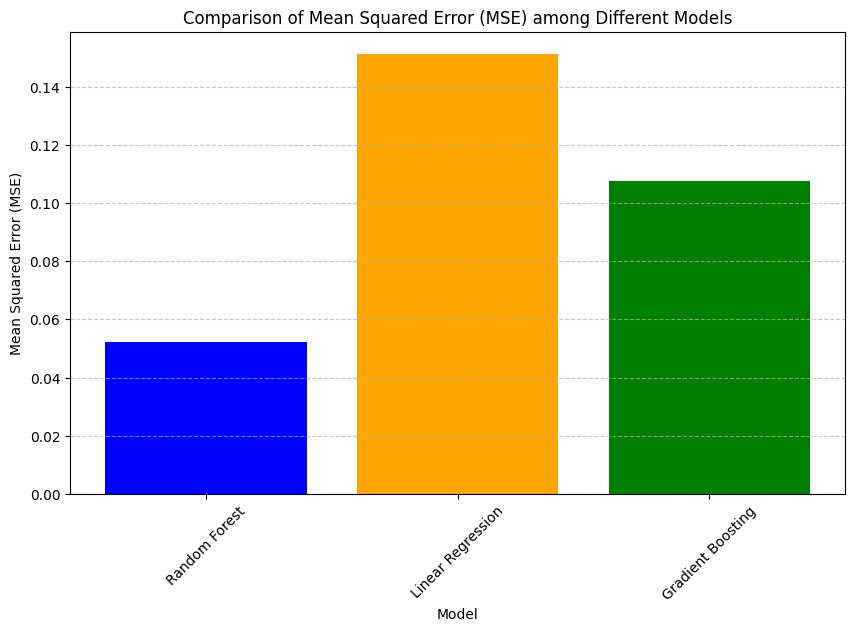

In [ ]:
import matplotlib.pyplot as plt

# Mean Squared Error for each model (already calculated)
rf_mse = 0.05218294729292488  # Replace with the actual MSE of Random Forest
lr_mse = 0.15130184226376348  # Replace with the actual MSE of Linear Regression
gb_mse = 0.10746859518346369  # Replace with the actual MSE of Gradient Boosting Regression

# List of models and their corresponding MSE
models = ['Random Forest', 'Linear Regression', 'Gradient Boosting']
mse_values = [rf_mse, lr_mse, gb_mse]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Different Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error


# Replace 'Flight' with the actual name of your target variable if it's different
y = merged_df['Flight']  # Target variable (migration patterns)
X = merged_df.drop(columns=['Flight', 'Id', 'Date'])  # Independent variables (features)

# Convert categorical variables to numerical values using one-hot encoding
X = pd.get_dummies(X, columns=['Region', 'Season'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier or regressor object
# If predicting classification:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# If predicting regression:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model (for classification)
# If predicting classification:
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# Evaluate the model (for regression)
# If predicting regression:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.05218294729292488


In [ ]:

rf_mse = 0.05218294729292488  # Replace with the actual MSE value
n_samples = len(X_test)  # Number of samples in the test set

# Calculating R-squared (R^2)
# R-squared is a measure of how well the model explains the variability of the target variable
# It ranges from 0 to 1, where 1 indicates perfect predictions
rf_r2 = 1 - (rf_mse / y_test.var())

# Calculating Root Mean Squared Error (RMSE)
# RMSE is another measure of the differences between predicted and actual values
# It is the square root of the MSE and is expressed in the same units as the target variable
rf_rmse = (rf_mse ** 0.5)

# Displaying the evaluation metrics
print("Random Forest Model Evaluation:")
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R^2):", rf_r2)
print("Root Mean Squared Error (RMSE):", rf_rmse)


Random Forest Model Evaluation:
Mean Squared Error (MSE): 0.05218294729292488
R-squared (R^2): 0.6581401035344077
Root Mean Squared Error (RMSE): 0.22843587129197743


model's estimated probabilities for the target variable

In [ ]:
# Assuming you have new data for the lunar cycle stored in a DataFrame called new_data
# Replace 'Id' and 'Date' with the actual names of the columns in your new data

# Drop 'Id' and 'Date' columns if present (assuming they are not used as features)
merged_df_features = merged_df.drop(columns=['Id', 'Date', 'Flight'], errors='ignore')

# Convert categorical variables to numerical values using one-hot encoding
merged_df_features = pd.get_dummies(merged_df_features, columns=['Region', 'Season'])

# Make predictions using the trained model
predictions = rf_model.predict(merged_df_features)

# Print or use the predictions as needed
print("Predictions:", predictions)



Predictions: [0.   0.   0.   ... 0.96 0.98 0.98]


In [ ]:
y = merged_df['Flight']  # Target variable (migration patterns)
X = merged_df[['Timing']]  # Independent variable (timing feature)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor object
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Prepare the input data with only the 'Timing' feature
input_data = pd.DataFrame({
    'Timing': [ 0.393776]  # Replace with the actual timing value you want to predict
}, columns=['Timing'])  # Include only the 'Timing' feature

# Make predictions using the trained model
predictions = rf_model.predict(input_data)

# Print or use the predictions as needed
print("Predicted Flight:", predictions)



Predicted Flight: [0.18652802]


In [ ]:
import pandas as pd


# Select the lunar cycle variables and the migration patterns (target variable)
lunar_cycle_variables = merged_df[['Timing', 'Exp. Time.','Duration']]
migration_patterns = merged_df['Flight']

# Calculate correlation matrix
correlation_matrix = lunar_cycle_variables.corrwith(migration_patterns)

# Print correlation coefficients
print("Correlation Coefficients:")
print(correlation_matrix)


Correlation Coefficients:
Timing       -0.048735
Exp. Time.   -0.044474
Duration     -0.044474
dtype: float64
